# Smoking dataset for Analysis using Random forest

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier, plot_tree


%matplotlib inline

### EDA

In [2]:
data = pd.read_csv('smoking.csv')

In [3]:
print(data.shape)
print(data.columns)
data.head()

(55692, 27)
Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')


ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

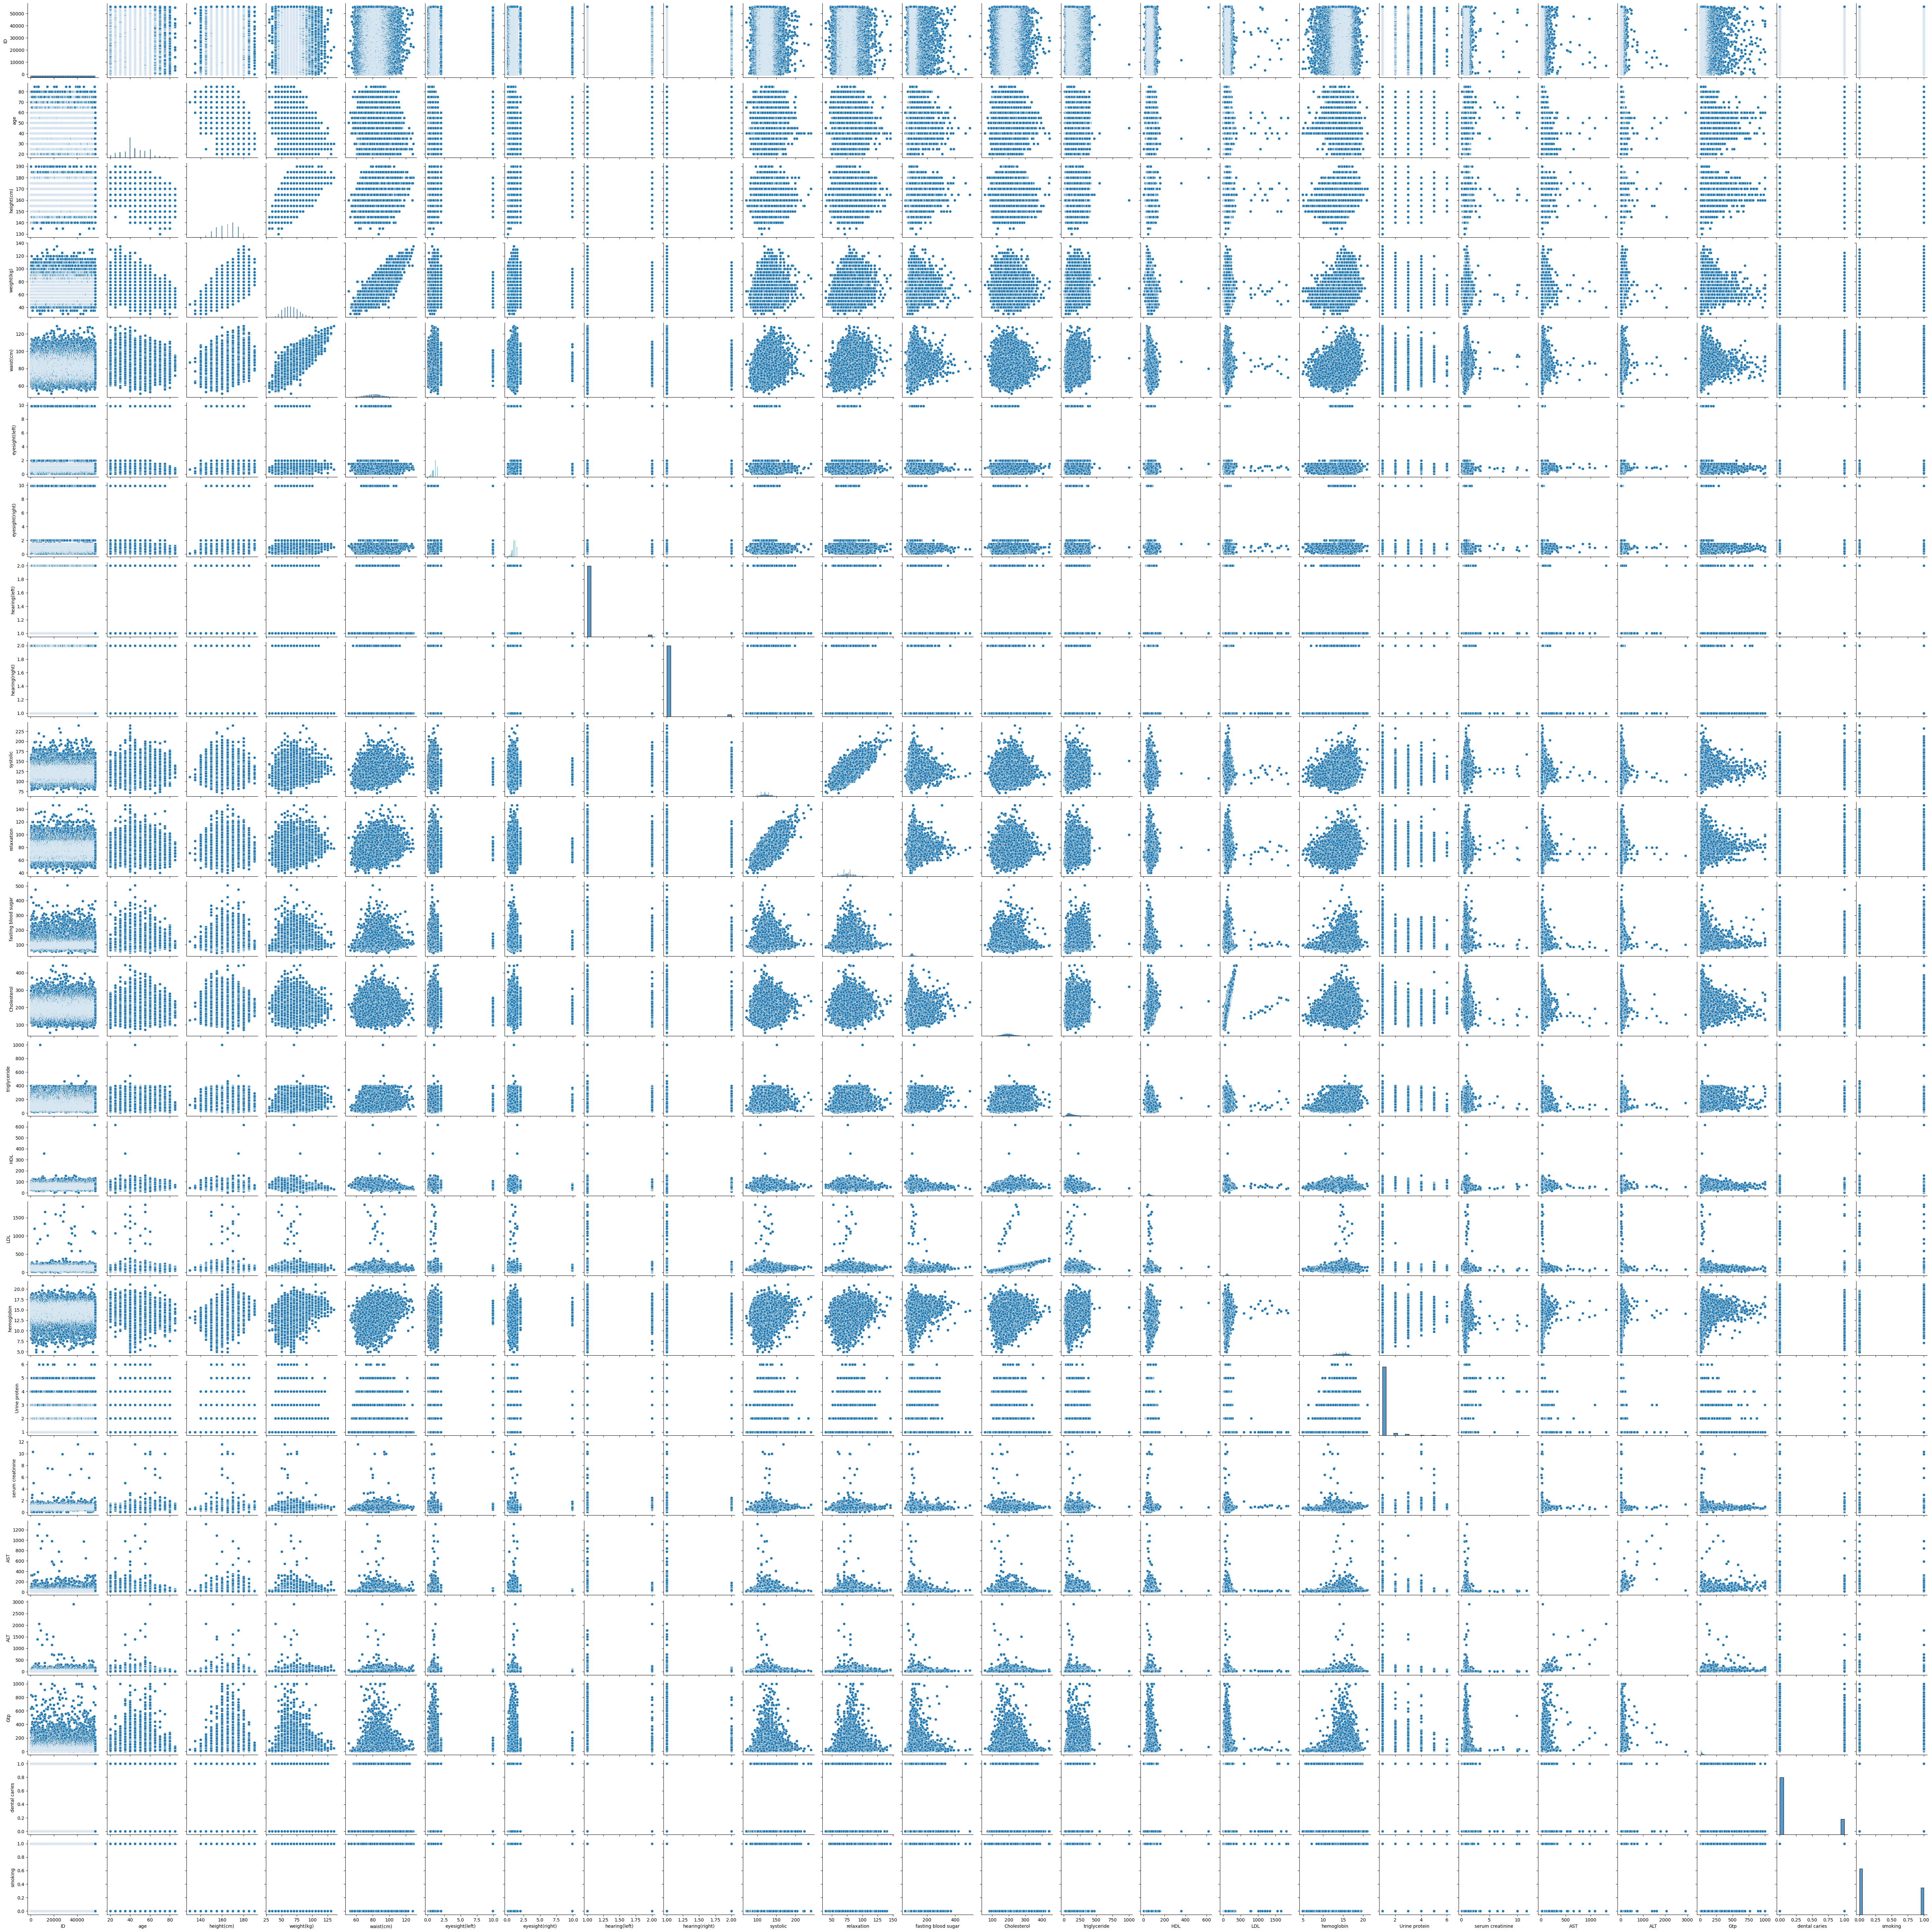

Wall time: 5min 18s


In [5]:
%%time

sns.pairplot(data)
plt.show()

In [6]:
h=pd.DataFrame.hist(data, figsize = (15,20), column = data.columns[:], color="blue", bins=8, xlabelsize=10, ylabelsize=10)

In [7]:
# Female = 0, male = 1, 
data.replace({"F": 0,"M": 1, "Y":0, "N":1}, inplace = True)

In [8]:
data.head()

ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0       0   40         155          60       81.3             1.2   
1   1       0   40         160          60       81.0             0.8   
2   2       1   55         170          60       80.0             0.8   
3   3       1   40         165          70       88.0             1.5   
4   4       0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     0              0   
1            1.0               0.6  22.0  19.0  18.0     0              0   
2            1.0               1.0  21.0  16.0  22.0     0              0   
3            1.0               1.0  19.0  26.0  18.0     0              0   
4            1.0               0.6  16.0  14.0  22.0     0              0   

   tartar  smoking  
0       0        0  
1       0        0  
2       1        1  
3       0        0  
4       1        0  

[5 rows x 27 columns]

### plotting co relation matrix

Text(0.5, 1.0, 'Correlation Plot')

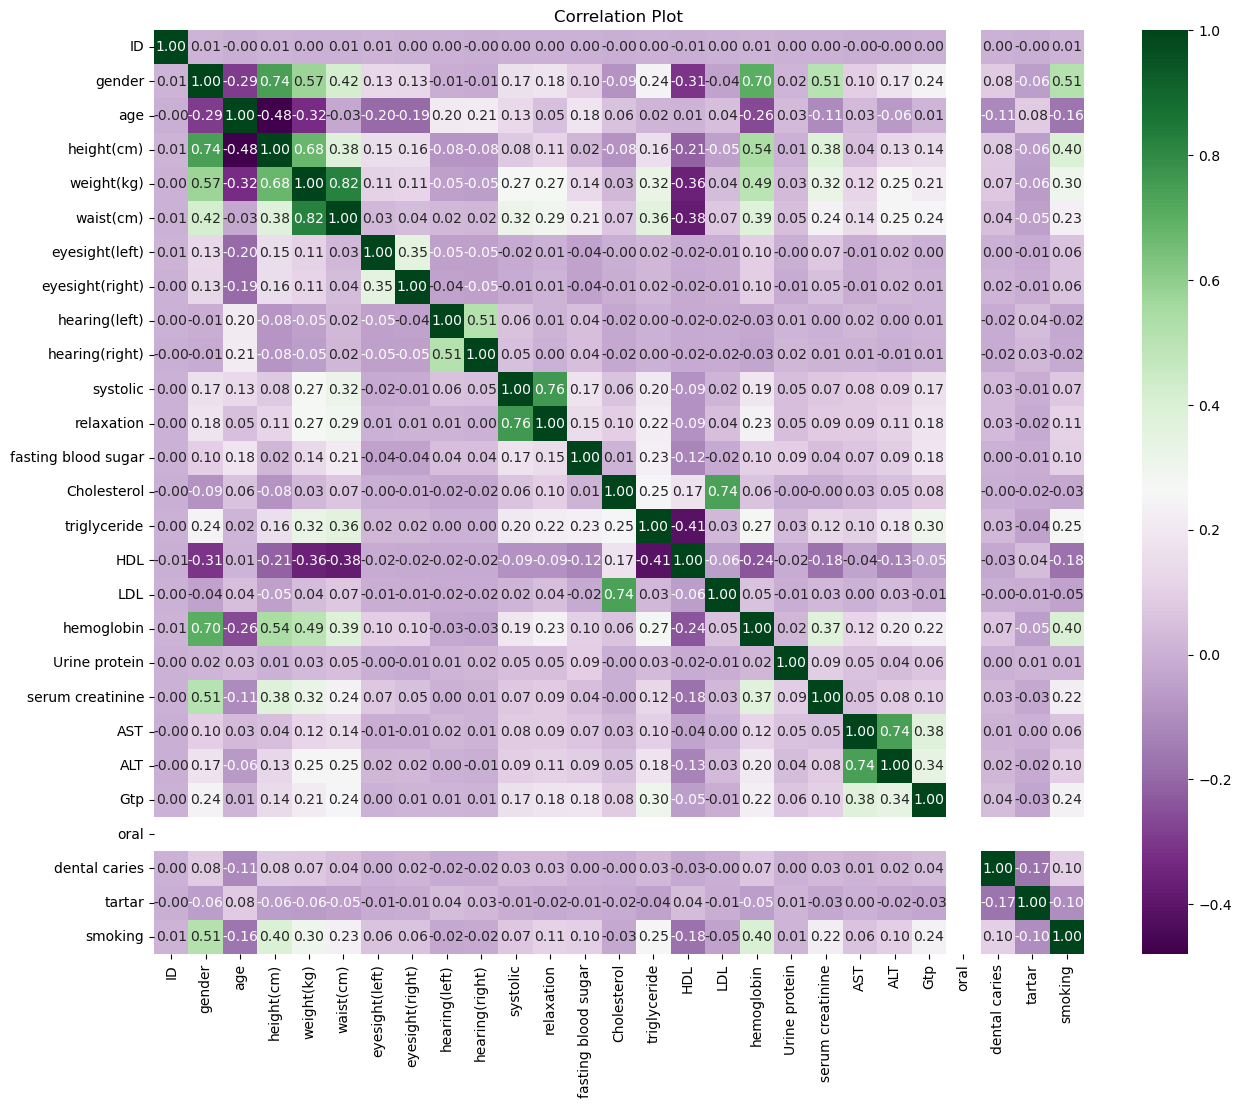

In [9]:
plt.figure(figsize=(15,12))

sns.heatmap(data.corr(), annot=True, cmap='PRGn', fmt='.2f',)
plt.title('Correlation Plot')

In [10]:
zero=data[data['smoking']==0]
one=data[data['smoking']==1]

In [11]:
print(zero.shape,one.shape)

(35237, 27) (20455, 27)


### Performing Method overloading to balance the Classification

In [12]:
count_class_0, count_class_1 = data.smoking.value_counts()
count_class_1

20455

In [13]:
over_sample_1=one.sample(count_class_0,replace=True)
len(over_sample_1)

35237

In [14]:
df=pd.concat([zero, over_sample_1],axis=0)
df.head()

ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0       0   40         155          60       81.3             1.2   
1   1       0   40         160          60       81.0             0.8   
3   3       1   40         165          70       88.0             1.5   
4   4       0   40         155          60       86.0             1.0   
5   5       1   30         180          75       85.0             1.2   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   
5              1.2            1.0             1.0  ...        16.2   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     0              0   
1            1.0               0.6  22.0  19.0  18.0     0              0   
3            1.0               1.0  19.0  26.0  18.0     0              0   
4            1.0               0.6  16.0  14.0  22.0     0              0   
5            1.0               1.2  18.0  27.0  33.0     0              0   

   tartar  smoking  
0       0        0  
1       0        0  
3       0        0  
4       1        0  
5       0        0  

[5 rows x 27 columns]

### 

In [15]:
print(df.smoking.value_counts())

0    35237
1    35237
Name: smoking, dtype: int64


### Initializing dependent and Independent Variables

In [16]:
X = df.drop('smoking',axis='columns')
y = df.smoking
X.head()

ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0       0   40         155          60       81.3             1.2   
1   1       0   40         160          60       81.0             0.8   
3   3       1   40         165          70       88.0             1.5   
4   4       0   40         155          60       86.0             1.0   
5   5       1   30         180          75       85.0             1.2   

   eyesight(right)  hearing(left)  hearing(right)  ...    LDL  hemoglobin  \
0              1.0            1.0             1.0  ...  126.0        12.9   
1              0.6            1.0             1.0  ...  127.0        12.7   
3              1.5            1.0             1.0  ...  226.0        14.7   
4              1.0            1.0             1.0  ...  107.0        12.5   
5              1.2            1.0             1.0  ...  129.0        16.2   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     0              0   
1            1.0               0.6  22.0  19.0  18.0     0              0   
3            1.0               1.0  19.0  26.0  18.0     0              0   
4            1.0               0.6  16.0  14.0  22.0     0              0   
5            1.0               1.2  18.0  27.0  33.0     0              0   

   tartar  
0       0  
1       0  
3       0  
4       1  
5       0  

[5 rows x 26 columns]

###  Dividing the data between training and testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Plotting decision tree

In [18]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Depth decision tree{} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()


In [19]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) # Training the model

DecisionTreeClassifier()

In [20]:
plot_decision_tree(dtc, X.columns)

In [21]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

### Bilding the random forest model

In [22]:
rfc = RandomForestClassifier()

In [23]:
n_estimators = [32, 33, 34, 35] # sample no of decision Tree
max_features = [23, 25, 26] # sample no of columns
bootstrap = [True, False]
oob_score = [True, False]

In [24]:
param_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [25]:
grid = GridSearchCV(rfc, param_grid)

### Fitting the model to check best parameters

In [26]:
grid.fit(X_train, y_train)

C:\Users\PRUTHVIRAJ K\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PRUTHVIRAJ K\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PRUTHVIRAJ K\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, F

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [23, 25, 26],
                         'n_estimators': [32, 33, 34, 35],
                         'oob_score': [True, False]})

### check for best parameters

In [27]:
grid.best_params_

{'bootstrap': True, 'max_features': 23, 'n_estimators': 32, 'oob_score': False}

#### Predicting the y through model with test data 

In [28]:
pred = grid.predict(X_test)

grid.best_estimator_.oob_score

False

### Plotting confusion matrix

In [30]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      6959
           1       0.86      0.94      0.90      7136

    accuracy                           0.89     14095
   macro avg       0.90      0.89      0.89     14095
weighted avg       0.90      0.89      0.89     14095

